In [ ]:
# ) Implement logistic regression using Python/R to perform classification on
# Social_Network_Ads.csv dataset. Compute Confusion matrix to find TP, FP, TN, FN,
# Accuracy, Error rate, Precision, Recall on the given dataset.

In [2]:
import pandas as pd

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df=pd.read_csv('social_network_ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [17]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [18]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [19]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [21]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [22]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [25]:
# converting string to float
mapi={'Male':1,'Female':0}
df=df.replace(mapi)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [26]:
#Train Test Split
x,y=df.drop(['Purchased'],axis=1),df['Purchased']

In [27]:
# train_test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)


In [28]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)


(300, 4)
(100, 4)
(300,)
(100,)


In [29]:
# standrd scaler
from sklearn.preprocessing import StandardScaler
sc_scale=StandardScaler()
xtrain=sc_scale.fit_transform(xtrain)
xtest=sc_scale.transform(xtest)

In [30]:
# Logistic regression model is build 
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(xtrain,ytrain)

LogisticRegression()

In [31]:
y_pred=classifier.predict(xtest)

In [32]:
# importing confusion matrix and displaying it for data
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,y_pred)
print("Confusion matrix : \n",cm)

Confusion matrix : 
 [[66  2]
 [ 8 24]]


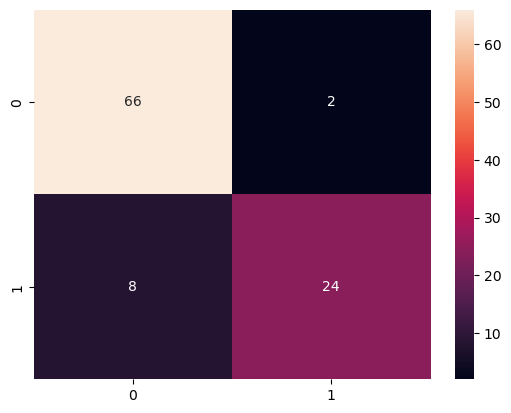

In [33]:
# confusion matrix using heatmap of seaborn library
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,annot=True)
plt.show()

In [34]:
# Accuracy of the model
from sklearn.metrics import accuracy_score
print("Accuracy is :",accuracy_score(ytest,y_pred)*100,'%')

Accuracy is : 90.0 %


In [35]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [36]:
# precision tp/(tp+fp)
precision=precision_score(ytest,y_pred)
print('Precision: %f' % precision)

Precision: 0.923077


In [37]:
#recall: tp/(tp+fn)
recall=recall_score(ytest,y_pred)
print('Recall: %f' % recall)

Recall: 0.750000


In [38]:
# f1 : 2 tp/(2 tp+fp+fn)
f1=f1_score(ytest,y_pred)
print('F1 score: %f' % f1)

F1 score: 0.827586
